In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os
import re

In [2]:
folder_path = '/Users/jio/Documents/DSP/kids1'
csv_files = [filename for filename in os.listdir(folder_path) if filename.endswith("_B1.csv") and not filename.endswith("BaseNoise_B1.csv")]


In [7]:
print(csv_files)

['G1_Hd1_FTDS_SP1_050418_162003_1_0_0_B1.csv', 'G1_Hd1_FTDS_SP1_050418_162003_1_0_2_B1.csv', 'G1_Hd1_FTDS_SP1_050418_162003_1_0_4_B1.csv', 'G1_Hd1_FTDS_SP1_050418_162003_1_0_1_B1.csv', 'G1_Hd1_FTDS_SP1_050418_162003_1_0_3_B1.csv']


In [8]:
for csv in csv_files:
    df = pd.read_csv(os.path.join(folder_path, csv), skiprows=4)
    data = df.iloc[0:, 1]

    print(f"Data from file: {csv}")
    print(data)
    print("\n")




Data from file: G1_Hd1_FTDS_SP1_050418_162003_1_0_0_B1.csv
Time [sec]  AE [V]      NaN
0.00000000  -0.104980   NaN
0.00000020  -0.053711   NaN
0.00000040  -0.024414   NaN
0.00000060  -0.029297   NaN
                         ..
0.00833220  -0.007324   NaN
0.00833240  -0.029297   NaN
0.00833260  -0.063477   NaN
0.00833280  -0.061035   NaN
0.00833300  -0.056152   NaN
Name: Unnamed: 1, Length: 41667, dtype: float64


Data from file: G1_Hd1_FTDS_SP1_050418_162003_1_0_2_B1.csv
Time [sec]  AE [V]      NaN
0.00000000  0.080566    NaN
0.00000020  0.078125    NaN
0.00000040  0.048828    NaN
0.00000060  0.014648    NaN
                         ..
0.00833220  -0.031738   NaN
0.00833240  -0.068359   NaN
0.00833260  -0.102539   NaN
0.00833280  -0.087891   NaN
0.00833300  -0.053711   NaN
Name: Unnamed: 1, Length: 41667, dtype: float64


Data from file: G1_Hd1_FTDS_SP1_050418_162003_1_0_4_B1.csv
Time [sec]  AE [V]      NaN
0.00000000  0.009766    NaN
0.00000020  0.036621    NaN
0.00000040  0.046387   

In [10]:
for csv in csv_files:
    df = pd.read_csv(os.path.join(folder_path, csv), header=4)
    df = df[[data]]

    file_name = os.path.splitext(csv)[0]
    step_number = extract_step_number(file_name)

    mean_value = df[data].mean()
    std_value = df[data].std()
    stderr_value = stats.sem(df[data])

    step_numbers.append(step_number)
    mean_values.append(mean_value)
    std_values.append(std_value)
    stderr_values.append(stderr_value)

    plt.figure(figsize=(12, 6))
    plt.plot(df['Time [sec]'], df['AE [V]'], label='Time Series Data')
    plt.xlabel('Time')
    plt.ylabel('Acoustic Intensity')
    plt.title(f'Time Series Data for Step # {step_number}')
    #plt.savefig(os.path.join(output_directory, f'{step_number}_timeseries.png'))
    plt.close()

    plt.figure(figsize=(12, 6))
    plt.hist(df['AE [V]'], bins=1000, label='Histogram')
    plt.xlabel('Acoustic Intensity')
    plt.ylabel('Count')
    plt.title(f'Histogram for Step # {step_number}')
    #plt.savefig(os.path.join(output_directory, f'{step_number}_histogram.png'))
    plt.close()

KeyError: "None of [Index([(nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, ...)], dtype='object')] are in the [columns]"

In [11]:
def average_column (csv_files):
    f = open(csv_files,"r")
    average = 0
    Sum = 0
    row_count = 0
    for row in f:
        for column in row.split(','):
            n=float(column)
            Sum += n
        row_count += 1
    average = Sum / len(column)
    f.close()
    return average
    print(average)

In [12]:

    df = pd.read_csv(os.path.join(folder_path, csv), header=4)
    df = df[[ 'AE [V]']]

print(df)

         AE [V]
0     -0.104980
1     -0.053711
2     -0.024414
3     -0.029297
4     -0.041504
...         ...
41661 -0.007324
41662 -0.029297
41663 -0.063477
41664 -0.061035
41665 -0.056152

[41666 rows x 1 columns]


In [14]:

file_name = os.path.splitext(csv)[0]
step_number = extract_step_number(file_name)

mean_value = df['AE [V]'].mean()
std_value = df['AE [V]'].std()
stderr_value = stats.sem(df['AE [V]'])

NameError: name 'extract_step_number' is not defined

In [ ]:
print(mean_value)
print(std_value)


-0.00021322413958623334
0.06477799847313867


In [ ]:

output_directory = '/content/drive/MyDrive/Colab Notebooks/dataset/output'
os.makedirs(output_directory, exist_ok=True)

def extract_step_number(file_name):
    match = re.search(r'(\d+)_B1', file_name)
    if match:
        step_number = match.group(1)
        return step_number
    return None

step_numbers = []
mean_values = []
std_values = []
stderr_values = []

for csv in csv_files:
    df = pd.read_csv(os.path.join(folder_path, csv), header=4)
    df = df[['Time [sec]', 'AE [V]']]

    file_name = os.path.splitext(csv)[0]
    step_number = extract_step_number(file_name)

    mean_value = df['AE [V]'].mean()
    std_value = df['AE [V]'].std()
    stderr_value = stats.sem(df['AE [V]'])

    step_numbers.append(step_number)
    mean_values.append(mean_value)
    std_values.append(std_value)
    stderr_values.append(stderr_value)

    plt.figure(figsize=(12, 6))
    plt.plot(df['Time [sec]'], df['AE [V]'], label='Time Series Data')
    plt.xlabel('Time')
    plt.ylabel('Acoustic Intensity')
    plt.title(f'Time Series Data for Step # {step_number}')
    plt.savefig(os.path.join(output_directory, f'{step_number}_timeseries.png'))
    plt.close()

    plt.figure(figsize=(12, 6))
    plt.hist(df['AE [V]'], bins=1000, label='Histogram')
    plt.xlabel('Acoustic Intensity')
    plt.ylabel('Count')
    plt.title(f'Histogram for Step # {step_number}')
    plt.savefig(os.path.join(output_directory, f'{step_number}_histogram.png'))
    plt.close()

In [ ]:

step_numbers = []
mean_values = []
std_values = []
stderr_values = []

for csv in csv_files:
    df = pd.read_csv(os.path.join(folder_path, csv), header=4)
    df = df[['Time [sec]', 'AE [V]']]

    file_name = os.path.splitext(csv)[0]
    step_number = extract_step_number(file_name)

    mean_value = df['AE [V]'].mean()
    std_value = df['AE [V]'].std()
    stderr_value = stats.sem(df['AE [V]'])

    step_numbers.append(step_number)
    mean_values.append(mean_value)
    std_values.append(std_value)
    stderr_values.append(stderr_value)


In [ ]:
print(path)

C:\Users\tipqc\Desktop\dataset\G1_Hd1_FTDS_SP1_050418_162003_1_0_0_B1.csv


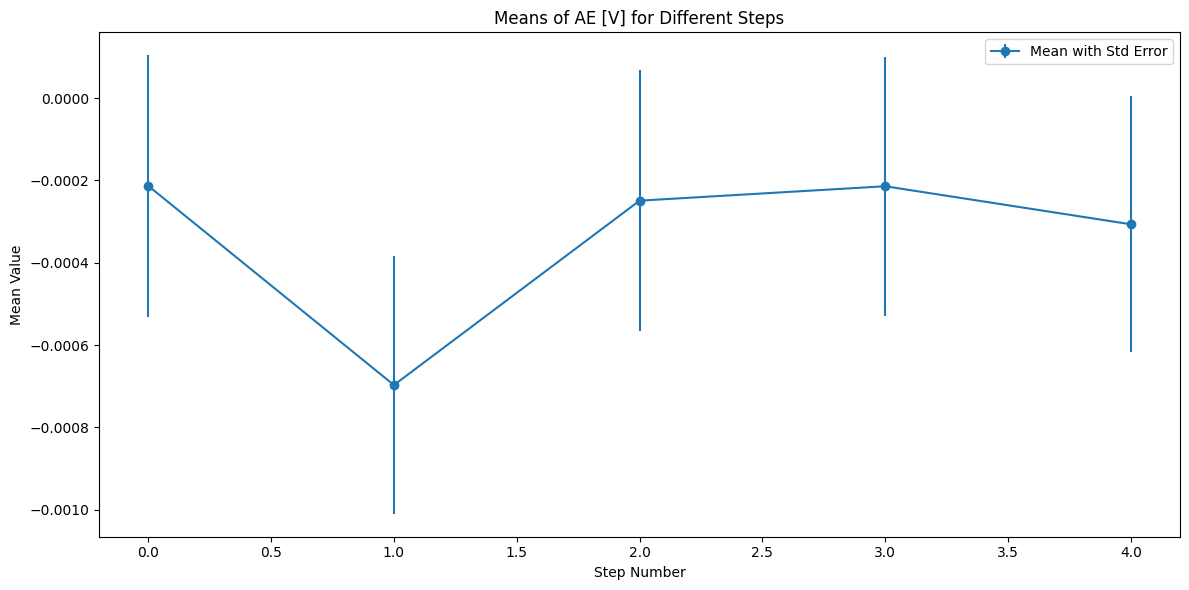

In [ ]:
plt.figure(figsize=(12, 6))
plt.errorbar(results_df['Step Number'], results_df['Mean'], yerr=results_df['Std Error'], fmt='o-', label='Mean with Std Error')
plt.xlabel('Step Number')
plt.ylabel('Mean Value')
plt.title('Means of AE [V] for Different Steps')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(output_directory, 'mean_values.png'))
plt.show()